#Enhanced Practical: Preprocessing Real-World Datasets for NLP


Objective

Expand text preprocessing to include stemming, N-grams, and TF-IDF (Term Frequency-Inverse Document Frequency) for advanced text transformation and feature extraction.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  I love this product! Best purchase ever. 😊 #happy   
1  Terrible service... never coming back! 😡 @Company   
2  Check out our website for amazing deals: https...   
3  Product arrived late, but quality is great. Th...   
4       Why is this app so slow? Fix it! #frustrated   

                                cleaned_text  
0            love product best purchase ever  
1         terrible service never coming back  
2                 check website amazing deal  
3  product arrived late quality great thanks  
4                               app slow fix  


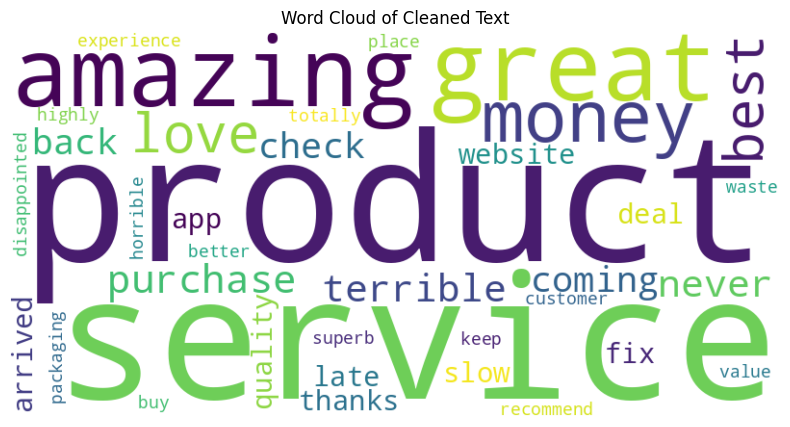

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Initialize stopwords, lemmatizer, and stemmer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to clean text
def clean_text(text):
    """
    Clean the text data:
    - Remove HTML tags, URLs, mentions, and hashtags
    - Convert text to lowercase
    - Remove special characters, numbers, and stopwords
    - Tokenize and apply lemmatization
    """
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Sample dataset
data = {
    "text": [
        "I love this product! Best purchase ever. 😊 #happy",
        "Terrible service... never coming back! 😡 @Company",
        "Check out our website for amazing deals: https://example.com",
        "Product arrived late, but quality is great. Thanks! 👍",
        "Why is this app so slow? Fix it! #frustrated",
        "Amazing experience! Highly recommend this place. ⭐⭐⭐⭐⭐",
        "Horrible! Totally waste of money. 👎",
        "Superb customer service! Keep it up. @SupportTeam",
        "Great value for money. Will buy again! #satisfied",
        "Disappointed with the packaging. Could be better. 🙁",
    ],
    "label": [
        "positive", "negative", "neutral", "positive", "negative",
        "positive", "negative", "positive", "positive", "negative"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)
print(df[['text', 'cleaned_text']].head())

# Exploratory Data Analysis
# Word Cloud
all_words = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()




In [6]:
### **Advanced Techniques**

#### **1. Stemming**
#- Stemming reduces words to their root form by removing suffixes (e.g., "running" -> "run").
#- This is useful when analyzing the base meaning of words without worrying about tense or plurality.

def stem_text(text):
    """
    Apply stemming to the text data.
    """
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

# Apply stemming
df['stemmed_text'] = df['cleaned_text'].apply(stem_text)
print(df[['cleaned_text', 'stemmed_text']].head())


                                cleaned_text  \
0            love product best purchase ever   
1         terrible service never coming back   
2                 check website amazing deal   
3  product arrived late quality great thanks   
4                               app slow fix   

                             stemmed_text  
0          love product best purchas ever  
1          terribl servic never come back  
2                  check websit amaz deal  
3  product arriv late qualiti great thank  
4                            app slow fix  


#2. N-grams

N-grams are contiguous sequences of N words from the text.

For example:

Unigram: "this", "is", "good"

Bigram: "this is", "is good"

Trigram: "this is good"

N-grams are useful for capturing the context and relationships between words.#

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Generate N-grams (e.g., bigrams)
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Bigram example
ngrams = vectorizer.fit_transform(df['cleaned_text'])

# Convert N-grams to a DataFrame
ngrams_df = pd.DataFrame(ngrams.toarray(), columns=vectorizer.get_feature_names_out())
print("N-grams DataFrame (Bigram Example):")
print(ngrams_df.head())


N-grams DataFrame (Bigram Example):
   amazing deal  amazing experience  app slow  arrived late  best purchase  \
0             0                   0         0             0              1   
1             0                   0         0             0              0   
2             1                   0         0             0              0   
3             0                   0         0             1              0   
4             0                   0         1             0              0   

   check website  coming back  could better  customer service  \
0              0            0             0                 0   
1              0            1             0                 0   
2              1            0             0                 0   
3              0            0             0                 0   
4              0            0             0                 0   

   disappointed packaging  ...  recommend place  service keep  service never  \
0                       

#3. TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a technique to represent text as numerical features.

It gives importance to rare but relevant words in a document while penalizing commonly occurring ones.

In [8]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=50)  # Limit to top 50 features for simplicity

# Apply TF-IDF
tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])

# Convert TF-IDF to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print("TF-IDF Features:")
print(tfidf_df.head())


TF-IDF Features:
    amazing      app   arrived      back      best  better  buy     check  \
0  0.000000  0.00000  0.000000  0.000000  0.460158     0.0  0.0  0.000000   
1  0.000000  0.00000  0.000000  0.460158  0.000000     0.0  0.0  0.000000   
2  0.440595  0.00000  0.000000  0.000000  0.000000     0.0  0.0  0.518291   
3  0.000000  0.00000  0.428537  0.000000  0.000000     0.0  0.0  0.000000   
4  0.000000  0.57735  0.000000  0.000000  0.000000     0.0  0.0  0.000000   

     coming  could  ...  recommend   service     slow  superb  terrible  \
0  0.000000    0.0  ...        0.0  0.000000  0.00000     0.0  0.000000   
1  0.460158    0.0  ...        0.0  0.391176  0.00000     0.0  0.460158   
2  0.000000    0.0  ...        0.0  0.000000  0.00000     0.0  0.000000   
3  0.000000    0.0  ...        0.0  0.000000  0.00000     0.0  0.000000   
4  0.000000    0.0  ...        0.0  0.000000  0.57735     0.0  0.000000   

     thanks  totally  value  waste   website  
0  0.000000      0.0  

Key Takeaways

Stemming simplifies words to their base form.

N-grams capture word sequences and their relationships.

TF-IDF converts text into numerical features, balancing term importance.

These techniques prepare text data for advanced NLP tasks like sentiment analysis or topic modeling.